# Análisis Exploratorio de Datos (EDA)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def porcentaje(df, columna):   
 
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_results = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_results


### EDA del dataset steam_games

In [ ]:
df_games = pd.read_parquet('data_games.parquet')

In [30]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29930 entries, 0 to 29929
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        29930 non-null  object 
 1   title         29930 non-null  object 
 2   release_date  29930 non-null  object 
 3   price         29930 non-null  float64
 4   item_id       29930 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [31]:
df_games

,genres,title,release_date,price,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,b'761140'
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,b'643980'
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,b'670290'
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,b'767400'
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,b'772540'
...,...,...,...,...,...
29925,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,1.99,b'745400'
29926,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,b'773640'
29927,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,b'733530'
29928,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,b'610660'


In [32]:
# Convertir la columna item_id 
df_games['item_id'] = df_games['item_id'].str.decode('utf-8')
# Filtrar filas con fechas válidas (no NaN)
df_games = df_games.dropna(subset=['release_date'])

In [33]:
df_games

,genres,title,release_date,price,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,4.99,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,0.00,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,0.00,670290
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,0.99,767400
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,3.99,772540
...,...,...,...,...,...
29925,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,1.99,745400
29926,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,1.99,773640
29927,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,4.99,733530
29928,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,1.99,610660


In [34]:
#expandir la columna genres
df_games = df_games.explode('genres',ignore_index=True)
#filtramos y llevamos a minusculas
df_games['genres'] = df_games['genres'].fillna('')
df_games['genres'] = df_games['genres'].str.lower()

In [35]:
df_games

,genres,title,release_date,price,item_id
0,action,Lost Summoner Kitty,2018-01-04,4.99,761140
1,casual,Lost Summoner Kitty,2018-01-04,4.99,761140
2,indie,Lost Summoner Kitty,2018-01-04,4.99,761140
3,simulation,Lost Summoner Kitty,2018-01-04,4.99,761140
4,strategy,Lost Summoner Kitty,2018-01-04,4.99,761140
...,...,...,...,...,...
74788,indie,Russian Roads,2018-01-04,1.99,610660
74789,racing,Russian Roads,2018-01-04,1.99,610660
74790,simulation,Russian Roads,2018-01-04,1.99,610660
74791,casual,EXIT 2 - Directions,2017-09-02,4.99,658870


In [36]:
#Eliminamos la columna price porque no la vamos a usar
df_games.drop('price', inplace=True, axis =1)

In [37]:
df_games

,genres,title,release_date,item_id
0,action,Lost Summoner Kitty,2018-01-04,761140
1,casual,Lost Summoner Kitty,2018-01-04,761140
2,indie,Lost Summoner Kitty,2018-01-04,761140
3,simulation,Lost Summoner Kitty,2018-01-04,761140
4,strategy,Lost Summoner Kitty,2018-01-04,761140
...,...,...,...,...
74788,indie,Russian Roads,2018-01-04,610660
74789,racing,Russian Roads,2018-01-04,610660
74790,simulation,Russian Roads,2018-01-04,610660
74791,casual,EXIT 2 - Directions,2017-09-02,658870


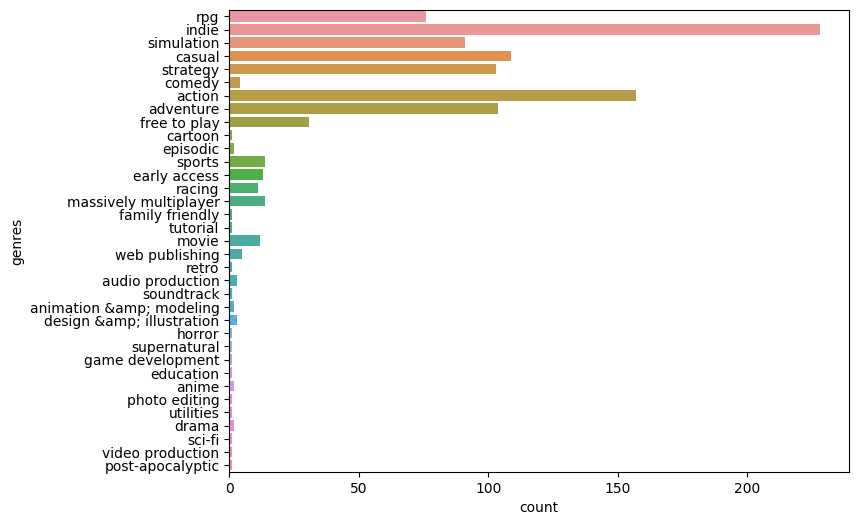

In [63]:
# Graficamos una muestra del dataset para observar la distribucion de los generos
plt.figure(figsize=(8,6))
sns.countplot(data=df_games.sample(n=1000), y='genres', orient='h')
plt.show()

In [39]:
# Observamos los porcentajes por genero
porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
genres,,
indie,15895,21.25
action,11462,15.32
casual,8288,11.08
adventure,8264,11.05
strategy,6957,9.30
...,...,...
noir,1,0.00
metroidvania,1,0.00
bullet hell,1,0.00


Creamos la columna year solo para el analisis

In [40]:
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')
df_games.dropna(subset=['release_date'], inplace=True)
df_games['year'] = df_games['release_date'].dt.year.astype(int)

In [43]:
df_games

,genres,title,release_date,item_id,year
0,action,Lost Summoner Kitty,2018-01-04,761140,2018
1,casual,Lost Summoner Kitty,2018-01-04,761140,2018
2,indie,Lost Summoner Kitty,2018-01-04,761140,2018
3,simulation,Lost Summoner Kitty,2018-01-04,761140,2018
4,strategy,Lost Summoner Kitty,2018-01-04,761140,2018
...,...,...,...,...,...
74788,indie,Russian Roads,2018-01-04,610660,2018
74789,racing,Russian Roads,2018-01-04,610660,2018
74790,simulation,Russian Roads,2018-01-04,610660,2018
74791,casual,EXIT 2 - Directions,2017-09-02,658870,2017


In [44]:
porcentaje(df_games, 'year')[:10]

,Cantidad,Porcentaje
year,,
2017,25694,34.72
2016,18139,24.51
2015,12717,17.19
2014,6572,8.88
2013,3229,4.36
2012,2276,3.08
2011,1138,1.54
2010,802,1.08
2009,572,0.77


In [52]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['year'].value_counts()

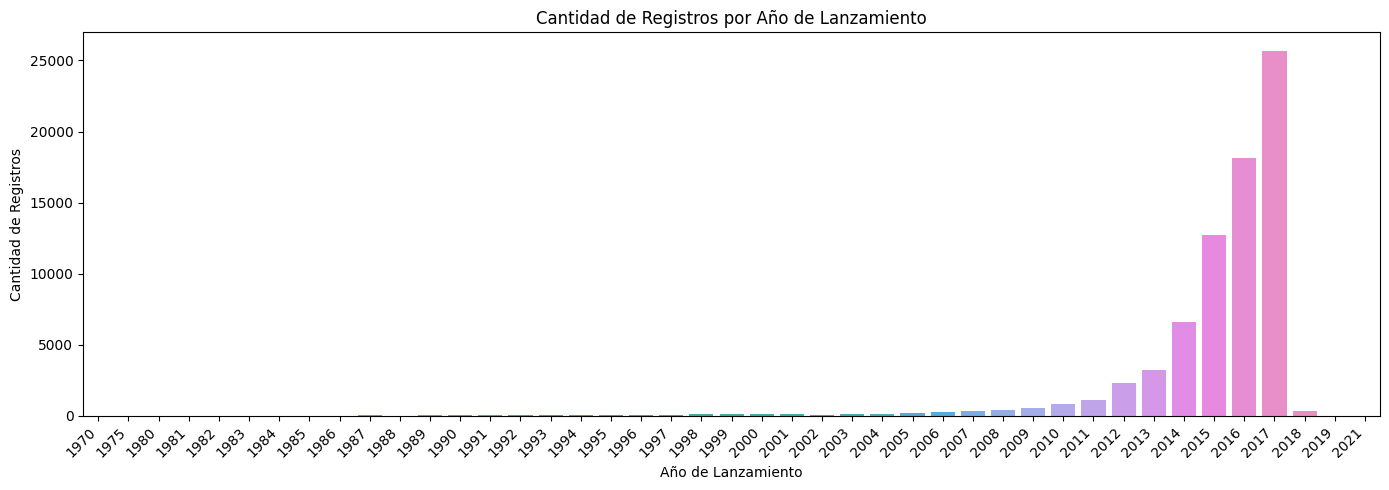

In [54]:
# Creamos una grafica de lanzamintos por año
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa la concentracion de los lanzamientos de los juegos en los años 2012-2018

### EDA del dataset data_reviws

In [56]:
df_reviews = pd.read_parquet('data_reviews.parquet')

In [57]:
df_reviews

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,2
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,2
4,js41637,2013-09-08,227300,True,0
...,...,...,...,...,...
59300,76561198312638244,2016-07-10,70,True,2
59301,76561198312638244,2016-07-08,362890,True,2
59302,LydiaMorley,2016-07-03,273110,True,2
59303,LydiaMorley,2016-07-20,730,True,1


Observemos cantidad y porcentaje de las columnas: sentiment_analysis y recommend

In [58]:
porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
sentiment_analysis,,
2,33175,55.94
1,13244,22.33
0,12886,21.73


In [60]:
porcentaje(df_reviews, 'recommend')

,Cantidad,Porcentaje
recommend,,
True,52473,88.48
False,6832,11.52


De los registros de reviews casi el 22% de los reviews reflejan sentimientos neutrales, el 56% reflejan sentimientos positivos hacia el juego y menos del 22% fue negativo. Pero en el 88% de los reviews se recomiendan los juegos que consumen.

## EDA del dataset users_items

In [86]:
df_items = pd.read_parquet('data_items.parquet')

In [87]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0
...,...,...,...,...
5153204,76561198329548331,346330,BrainBread 2,0.0
5153205,76561198329548331,373330,All Is Dust,0.0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5153207,76561198329548331,521570,You Have 10 Seconds 2,4.0


Como vemos en la columna playtime_forever, posee valores 0.0 que podriamos eliminar para disminuir el tamaño de archivo y asi mejorar la performance de la Api en Render. 

In [88]:
df_items = df_items[df_items.playtime_forever != 0.0]

In [89]:
df_items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
2,76561197970982479,30,Day of Defeat,7.0
8,76561197970982479,300,Day of Defeat: Source,4733.0
9,76561197970982479,240,Counter-Strike: Source,1853.0
10,76561197970982479,3830,Psychonauts,333.0
...,...,...,...,...
5153202,76561198329548331,304930,Unturned,677.0
5153203,76561198329548331,227940,Heroes & Generals,43.0
5153206,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5153207,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [90]:
df_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False).head(20)

user_id
REBAS_AS_F-T          4660393.0
shinomegami           3303502.0
Sp3ctre               2822860.0
DownSyndromeKid       2790419.0
Terminally-Chill      1734007.0
stopgovtcorruption    1717609.0
Steamified            1693063.0
Cow666                1674805.0
PiozZ                 1570365.0
76561198022404680     1378726.0
tobscene              1365671.0
76561198018677971     1316130.0
LapFucksTrax          1304502.0
76561198063648921     1304102.0
archy18               1291463.0
jimmynoe              1240958.0
idonothack            1182866.0
76561198058230663     1171869.0
benjamingarrison      1065984.0
clawbot44             1057620.0
Name: playtime_forever, dtype: float64

Haciendo este procedimiento observamos que las unidades de la columna 'playtime_forever' no puede estar en horas, por lo que en las funciones utilizadas se dividen por 60.

In [91]:
df_items.loc[:, 'playtime_forever'] = round((df_items['playtime_forever'] / 60), 2)

Solo que modifica la columna para anilisis. 

In [95]:
df_items['playtime_forever'].describe()

count    3.285246e+06
mean     2.592093e+01
std      1.120172e+02
min      2.000000e-02
25%      7.300000e-01
50%      3.420000e+00
75%      1.347000e+01
max      1.071288e+04
Name: playtime_forever, dtype: float64

In [96]:
top_horas = df_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False).head(20)

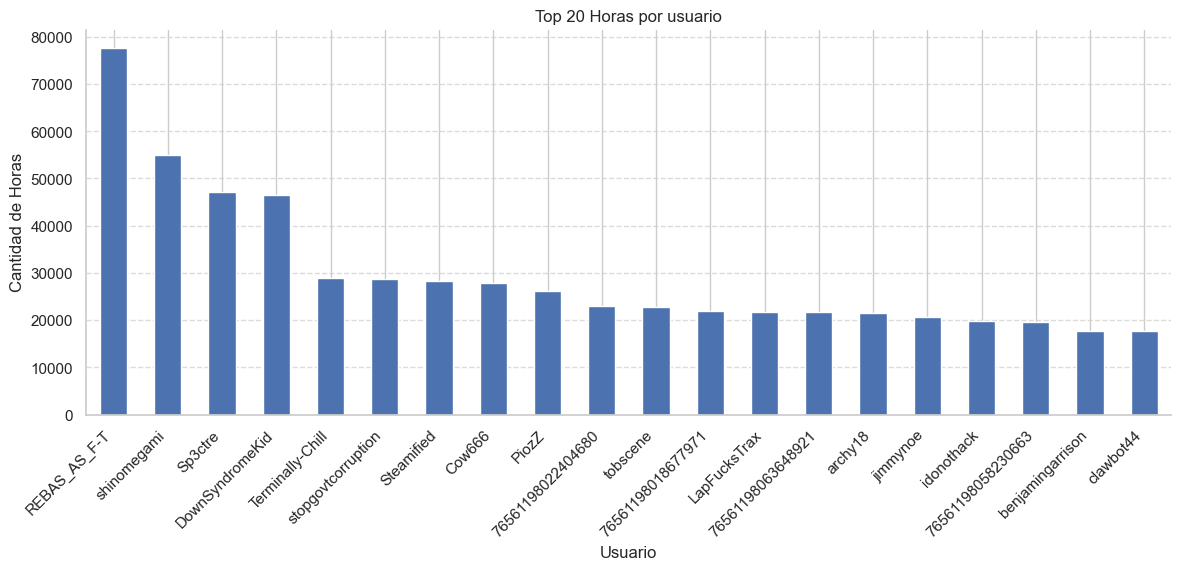

In [101]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
top_horas.plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Horas') ; plt.title('Top 20 Horas por usuario')
# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right")

# Añadir una cuadrícula detrás del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir un borde a las barras
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Valores Atipicos

In [103]:

q1 = df_items.playtime_forever.describe()[4]
q3 =df_items.playtime_forever.describe()[6]

 # Valor del vigote
bigote_max = round(q3 + 1.5*(q3 - q1), 2)

# Cantidad de atípicos
print(f'Hay {(df_items.playtime_forever > bigote_max).sum()} valores atípicos en la variable {df_items.playtime_forever.name}')

Hay 436551 valores atípicos en la variable playtime_forever


Se podria seguir eliminando elementos. Dado el plazo del proyecto se decide no modificar el archivo con estas ultimas observaciones. Inclusive dejando la columna 'playtime_forever' como estaba. 